### Laboratorio 3 Inteligencia artificial
Marco Orozco 20857

### Task 1.1
Obtenemos los datos y los introducimos en un np array, para ello importamos las librerias necesarias

In [53]:
import math
import numpy as np
from matplotlib import pyplot as plt

from gradient_descent import gradient_descent
from linear_cost import linear_cost, linear_cost_gradient
from linear_regression import linear_regression, norm, cost, grad

# TASK 1.1
data = np.genfromtxt('kc_house_data.csv', delimiter=',')

### Task 1.2
Ajustamos las variables del modelo para realizar una regresion lineal simple

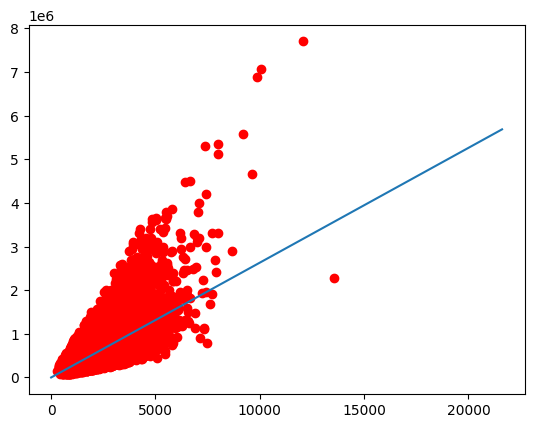

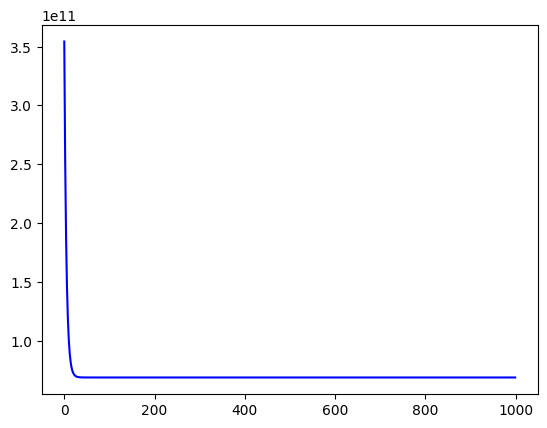

In [85]:
# TASK 1.2

# X es la columna 3 y Y la columna 19
# ignoramos el titulo del csv
X = data[1:, 5].reshape(-1, 1)
Y = data[1:, 2].reshape(-1, 1)

Xr = np.hstack((np.ones_like(X), X))
theta_0 = np.random.rand(Xr.shape[1], 1) 

# codigo visto en clase
cost = lambda X, y, t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)

# Aplicar la regreison lineal
thetaf, costs = linear_regression(
    Xr,
    Y,
    theta_0,
    cost,
    grad,
    a=0.00000001,
    n=1000
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Pendiente
ym = xmr @ thetaf 

# Gráfica x vs y.
plt.plot(X, Y, "ro")
plt.plot(xm, ym)
plt.show()

# Costos
plt.plot(costs, color="blue")
plt.show()

### Task 1.3
Implementar el algoritmo del gradiente visto en clase

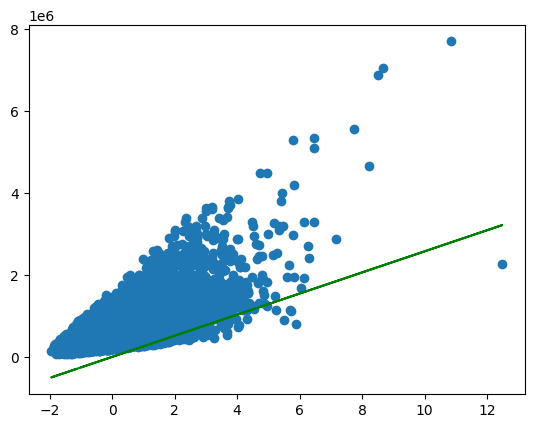

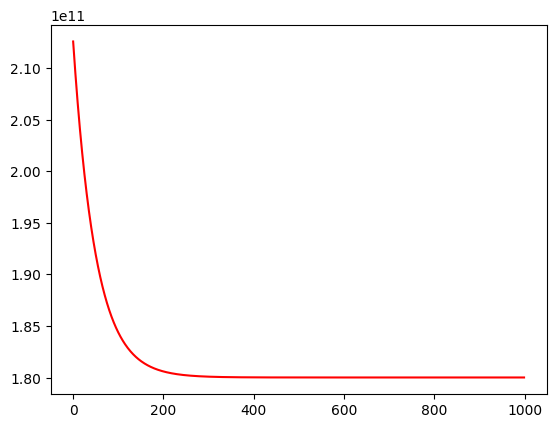

Evaluación del modelo
Coeficiente de determinación (R2): -1.6714408194816732
Error cuadrático medio (MSE): 360046487833.6621


In [55]:
# Normalizar
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

m, n = X.shape
theta_0 = np.random.rand(n, 1)
r_theta, costs, thetas = gradient_descent(
    theta_0,
    linear_cost,
    linear_cost_gradient,
    learning_rate=0.01,
    threshold=0.001,
    max_iter=1000,
    params=[X,Y, 0.1]
)

# realizar predicciones
y_pred = X @ r_theta

plt.scatter(X[:, 0], Y, label='con toda la data')
plt.plot(X[:, 0], y_pred, color='green')
plt.show()

#Gráfica de los costos
plt.plot(costs, color="red")
plt.show()

print("Evaluación del modelo")
r2 = 1 - ((Y - y_pred) ** 2).sum() / ((Y - Y.mean()) ** 2).sum()
mse = ((Y - y_pred) ** 2).mean()

print("Coeficiente de determinación (R2):", r2)
print("Error cuadrático medio (MSE):", mse)

Podemos observar que una regresión lineal simple no se para nada a todo el dataset, necesitaremos dividir el dataset en partes para elegir un polinomio de grado correcto

### 1.4 Utilizar cross validation
Dividiremos el dataset en 3 partes para evaluar el rendimiento de diferentes grados de un polinomio

In [132]:
# Mezclar aleatoriamente los datos
# ignoramos el titulo del csv
X = data[1:, 5].reshape(-1, 1)
Y = data[1:, 2].reshape(-1, 1)
import random
comb = list(zip(X, Y))
random.shuffle(comb)

X, Y = zip(*comb)
X, Y = np.array(X), np.array(Y)

n = len(X)  # Número de ejemplos
indices = np.random.permutation(n)

# Definir tamaños de las particiones
# Calcula los índices para dividir el array en las proporciones deseadas
n = len(X)
first_split_idx = int(n * 0.4)
second_split_idx = int(n * 0.8)

# Divide el array en las proporciones deseadas
X_1, X_2, X_test = np.split(X, [first_split_idx, second_split_idx])

n = len(Y)
first_split_idx = int(n * 0.4)
second_split_idx = int(n * 0.8)

# Divide el array en las proporciones deseadas
Y_1, Y_2, Y_test = np.split(Y, [first_split_idx, second_split_idx])

Ya tenemos el dataset en 3 partes, procedemos a realizar una regresion lineal para el primer conjunto de datos con un k (grado del polinomio) = 60

C:\Users\Mark\AppData\Local\Temp\ipykernel_21704\4278659296.py:7: RuntimeWarning: overflow encountered in square
  cost = lambda X, y, t: ((X @ t - y) ** 2).sum() / len(y)
C:\Users\Mark\AppData\Local\Temp\ipykernel_21704\4278659296.py:8: RuntimeWarning: overflow encountered in matmul
  grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)
c:\Users\Mark\Documents\Universidad\IA\lab3\linear_regression.py:4: RuntimeWarning: invalid value encountered in subtract
  t -= a * grad(X, y, t)


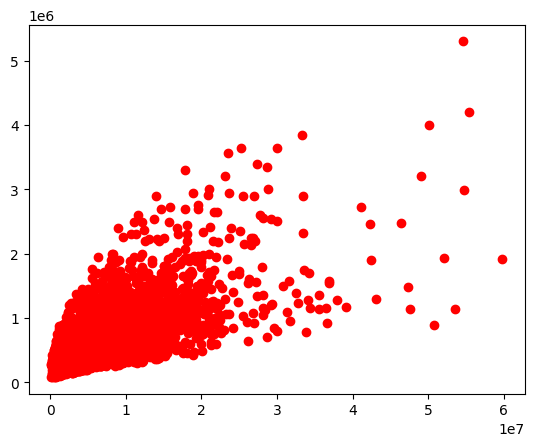

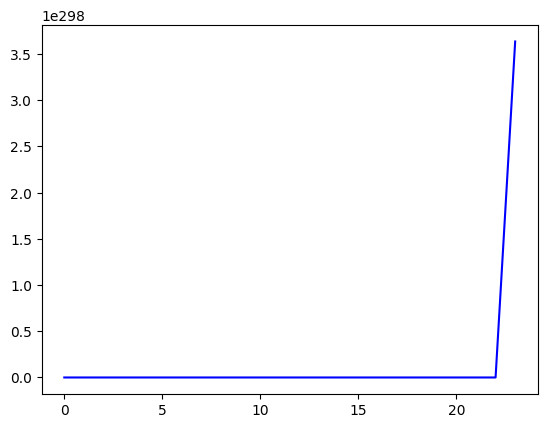

In [133]:
X_1 = np.power(X_1, 2)

Xr = np.hstack((np.ones_like(X_1), X_1))
theta_0 = np.random.rand(Xr.shape[1], 1)

# codigo visto en clase
cost = lambda X, y, t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)

# Aplicar la regreison lineal
thetaf, costs = linear_regression(
    Xr,
    Y_1,
    theta_0,
    cost,
    grad,
    a=0.00000001,
    n=1000
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Pendiente
ym = xmr @ thetaf 

# Gráfica x vs y.
plt.plot(X_1, Y_1, "ro")
plt.plot(xm, ym)
plt.show()

# Costos
plt.plot(costs, color="blue")
plt.show()

#### Task 1.5
EL modelo correcto parece ser uno de grado 3, debido a que tiene un buen ajsute con los datos